# Inheritance with ML

 We introuduced the concept of OOP in python and how it can be used to create a class.  We will also discuss how to create a class and how to use the class using inheritance.
 We will work just using Numpy to create a machine learning technique you all are familiar with **Linear Regression.**

In [83]:
import numpy as np

A very simple class *MyLinearRegression* that implements the linear regression.

You have to implement the following inside the class in **__init__ method.**
arguments : **fit_intercept** : boolean, optional, default True
    Specifies if a constant (a.k.a. bias or intercept) should be
    added to the decision function.

**coefficients**: with a value of None : array of shape (n_features)
    Estimated coefficients for the linear regression problem.

**intercept**: with a value of None  : float
    Estimated intercept (a.k.a. bias) for the linear regression problem.

finally you have to call the **fit_intercept** method as a *private method*. i.e. this is a method that is not accessible outside the class to the user of the class.

In [84]:
class MyLinearRegression:
    
    def __init__(self, fit_intercept=True):
        
        self.coefficients = None
        self.intercept = None

        self.fit_intercept = fit_intercept
        
        # y = mx + c 

#### Create an instance and check attributes

In [85]:
instance = MyLinearRegression()

# instance.__init__()
# print(instance.coefficients)

print(instance)


#### Built-in description method
We can add a special built-in method __str__ to create a short description string which returns the string " I am a linear regression model"

In [86]:
class MyLinearRegression:
    
    def __init__(self, fit_intercept=True):
        
        self.coefficients = None
        self.intercept = None

        self.fit_intercept = fit_intercept
        
        # y = mx + c 

    def __str__(self):
        return f"I am a linear regression model"



Now that you have created the class, test if the instance you create returns the string " I am a linear regression model" by running the following code.

In [87]:
# print("your_instance")  # replace with your instance of MyLinearRegression


# print(MyLinearRegression())

regre = MyLinearRegression()

print(regre)

I am a linear regression model


#### Adding the fit method
Now, we can add the core fitting method called fit. This uses linear algebra routines from NumPy to solve a linear regression (single or multi-variate) problem.

In [88]:
class MyLinearRegression:
    
    def __init__(self, fit_intercept=True):
        self.coefficients = None
        self.intercept = None

        self.fit_intercept = fit_intercept
        
        # y = mx + c 
    
    def __str__(self):
        return f"I am a linear regression model"
    
    def fit(self, X, y):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array 
        y: 1D numpy array
        """
        
        # check if X is 1D or 2D array
        
        #your code here

        if len(X.shape) == 1:               
            X = X.reshape(-1,1) 

        
            
        # adding bias if fit_intercept is True
        if self.fit_intercept:
            X_biased = np.c_[np.ones(X.shape[0]), X]#
        else:
            X_biased = X
        
        
        # closed form solution, i will give you the code for now
        
        
        xTx = np.dot(X_biased.T, X_biased)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X_biased.T, y)
        coef = np.dot(inverse_xTx, xTy)
        
        # set attributes from the init function
        if self.fit_intercept:
            #pass  # delete the pass statement
            # intercept attribute
            self.intercept = coef[0]
            
            # coef attribute
            self.coefficients = coef[1:]
        else:
            #pass  # delete the pass statement
            # intercept attribute
            self.intercept= 0
            
            # coef attribute
            self.coefficients = coef
            

Generate some random data for test

In [89]:
X = 10*np.random.random(size=(20,2))
y = 3.5*X.T[0]-1.2*X.T[1]+2*np.random.randn(20)

In [90]:
import matplotlib.pyplot as plt

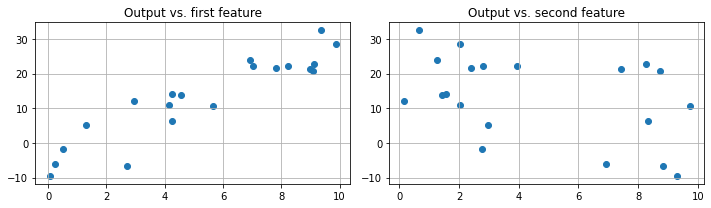

In [91]:
fig, ax = plt.subplots(1,2,figsize=(10,3))

ax[0].scatter(X.T[0],y)
ax[0].set_title("Output vs. first feature")
ax[0].grid(True)
ax[1].scatter(X.T[1],y)
ax[1].set_title("Output vs. second feature")
ax[1].grid(True)
fig.tight_layout()
plt.show()

Instantiate a new MyLinearRegression object and fit the data

In [92]:
# instantiate 
lr = MyLinearRegression()


In [93]:
#fit the data
lr.fit(X,y)

In [94]:
# print the coefficients
lr.coefficients

array([ 3.26402782, -1.24304945])

In [95]:
# print the intercept
lr.intercept

1.4499837656184553


Comparison of ground truth and fitted values
Woudn't it be nice to compare the ground truth with the predictions and see how closely they fit

In [96]:
#unccomment the following line to see the plot
coef_ = lr.coefficients  # replace mlr with your instance
y_pred = np.dot(X,coef_)+lr.intercept  # replace mlr with your instance

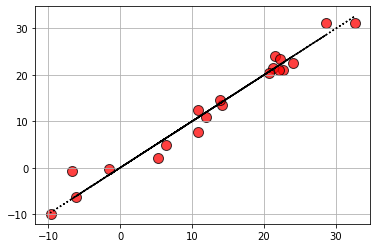

In [97]:
##uncomment the following to see the plot
plt.scatter(y,y_pred,s=100,alpha=0.75,color='red',edgecolor='k')
plt.plot(y,y,c='k',linestyle='dotted')
plt.grid(True)
plt.show()


**Encapsulation**
But we don't want to write stand-alone code. Can we encapsulate the code inside the class?

In [98]:
class MyLinearRegression:
    
    def __init__(self, fit_intercept=True):
        self.coefficients = None
        self.intercept = None

        self.fit_intercept = fit_intercept
        
        # y = mx + c 
    
    def __str__(self):
        return f"I am a linear regression model"
    
    def fit(self, X, y):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array 
        y: 1D numpy array
        """
        
        # check if X is 1D or 2D array
        
        #your code here

        if len(X.shape) == 1:               
            X = X.reshape(-1,1) 
           
        # adding bias if fit_intercept is True
        if self.fit_intercept:
            X_biased = np.c_[np.ones(X.shape[0]), X]#
        else:
            X_biased = X
        
        # closed form solution, i will give you the code for now
        
        xTx = np.dot(X_biased.T, X_biased)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X_biased.T, y)
        coef = np.dot(inverse_xTx, xTy)
        
        # set attributes from the init function
        if self.fit_intercept:
            #pass  # delete the pass statement
            # intercept attribute
            self.intercept = coef[0]
            
            # coef attribute
            self.coefficients = coef[1:]
        else:
            #pass  # delete the pass statement
            # intercept attribute
            self.intercept= 0
            
            # coef attribute
            self.coefficients = coef

        # add the fitted values to the instance, i.e the predicted values seen earlier

        # the y_pred formulat and assign it to self.fitted 

        self.fitted = np.dot(X,coef_)+lr.intercept
    
    # create a method to plot the data and the fitted line
    def plot_fitted(self,reference_line=False):
        """
        Plots fitted values against the true output values from the data
        
        Arguments:
        reference_line: A Boolean switch to draw a 45-degree reference line on the plot
        """
        
        # title of the plot
        plt.title("Fitted values against True values")
        
        # plot the data scatter graph
        #plt.scatter(y,self.fitted_)
        plt.scatter(y,self.fitted,s=100,alpha=0.75,color='red',edgecolor='k')
                
        # plot the reference line if required
        if reference_line:
            #pass # delete the pass statement
            plt.plot(y,y,c='k')
        # set the x and y labels of the plot 
        plt.xlabel("True Values")
        plt.ylabel("Fitted Values")
        
        # show the plot
        plt.grid(True)
        plt.show()
            

#### Demo the new plot_fitted method
Now the MyLinearRegression class has the ability (aka methods) to both fit the data and visualize the fitted/true output values in a plot

In [99]:
# A fresh instance
fresh = MyLinearRegression()
# Fitting with the data

fresh.fit(X,y)



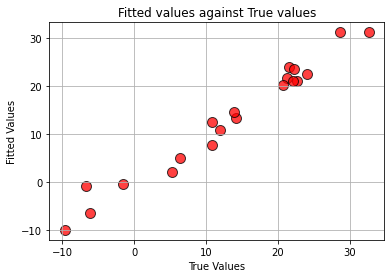

In [100]:
# Call the 'plot_fitted' method
fresh.plot_fitted()

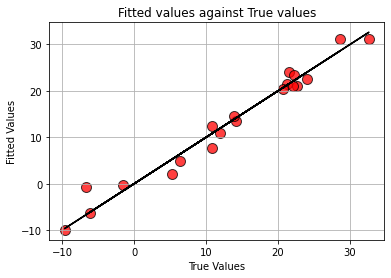

In [101]:
# We can pass on a switch 'reference_line' to draw a 45-degree reference line on the plot
fresh.plot_fitted(reference_line=True)

##  Adding a predict method
Now, we want to extend the functionality and add a predict method to enable the class to predict for any arbitrary new dataset

#### Re-write the class and add the predict method provide below replacing the intercept and coefficient values with those specified in your class

def predict(self, X):
        """Output model prediction.

        Arguments:
        X: 1D or 2D numpy array
        """
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        self.predicted_ = self.intercept_ + np.dot(X, self.coef_)  #change attr here
        
        return self.predicted_

In [102]:
class MyLinearRegression:
    
    def __init__(self, fit_intercept=True):
        self.coefficients = None
        self.intercept = None

        self.fit_intercept = fit_intercept
        
        # y = mx + c 
    
    def __str__(self):
        return f"I am a linear regression model"
    
    def fit(self, X, y):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array 
        y: 1D numpy array
        """
        
        # check if X is 1D or 2D array
        
        #your code here

        if len(X.shape) == 1:               
            X = X.reshape(-1,1) 
           
        # adding bias if fit_intercept is True
        if self.fit_intercept:
            X_biased = np.c_[np.ones(X.shape[0]), X]#
        else:
            X_biased = X
        
        # closed form solution, i will give you the code for now
        
        xTx = np.dot(X_biased.T, X_biased)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X_biased.T, y)
        coef = np.dot(inverse_xTx, xTy)
        
        # set attributes from the init function
        if self.fit_intercept:
            #pass  # delete the pass statement
            # intercept attribute
            self.intercept = coef[0]
            
            # coef attribute
            self.coefficients = coef[1:]
        else:
            #pass  # delete the pass statement
            # intercept attribute
            self.intercept= 0
            
            # coef attribute
            self.coefficients = coef

        # add the fitted values to the instance, i.e the predicted values seen earlier

        # the y_pred formulat and assign it to self.fitted 

        
    
    # create a method to plot the data and the fitted line
    def plot_fitted(self,reference_line=False):
        """
        Plots fitted values against the true output values from the data
        
        Arguments:
        reference_line: A Boolean switch to draw a 45-degree reference line on the plot
        """
        
        # title of the plot
        plt.title("Plots fitted values against the true output values from the data")
        
        # plot the data scatter graph
        #plt.scatter(y,self.fitted_)
        plt.scatter(y,y_pred,s=100,alpha=0.75,color='red',edgecolor='k')
                
        # plot the reference line if required
        if reference_line:
            #pass # delete the pass statement
            plt.plot(y,y,c='k')
        # set the x and y labels of the plot 
        plt.xlabel("True Values")
        plt.ylabel("Fitted Values")
        
        # show the plot
        plt.grid(True)
        plt.show()



def predict(self, X):
        """Output model prediction.

        Arguments:
        X: 1D or 2D numpy array
        """
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        self.predicted_ = self.intercept_ + np.dot(X, self.coef_)  #change attr here
        
        return self.predicted_

### Metrics class
We could have added a whole bunch of methods directly into the MyLinearRegression class. But, instead, we will show the power of inheritance and define a separate class Metrics for computing common metrics of a regression model.

Note, this class has no __init__ method because we will never instantiate an object using this class. Rather, we will sort of absorb this class into the MyLinearRegression class.

def sse(self):
        '''returns sum of squared errors (model vs actual)'''
        squared_errors = (self.resid_) ** 2
        self.sq_error_ = np.sum(squared_errors)
        return self.sq_error_
        
    def sst(self):
        '''returns total sum of squared errors (actual vs avg(actual))'''
        avg_y = np.mean(self.target_)
        squared_errors = (self.target_ - avg_y) ** 2
        self.sst_ = np.sum(squared_errors)
        return self.sst_
    
    def r_squared(self):
        '''returns calculated value of r^2'''
        self.r_sq_ = 1 - self.sse()/self.sst()
        return self.r_sq_

    
    def mse(self):
        '''returns calculated value of mse'''
        self.mse_ = np.mean( (self.predict(self.features_) - self.target_) ** 2 )
        return self.mse_
    
    def pretty_print_stats(self):
        '''returns report of statistics for a given model object'''
        items = ( ('sse:', self.sse()), ('sst:', self.sst()), 
                 ('mse:', self.mse()), ('r^2:', self.r_squared()), 
                  )
        for item in items:
            print('{0:8} {1:.4f}'.format(item[0], item[1]))

Use the above functions and wrap in a class called Metrics.

In [103]:
class Metrics:
    def sse(self):
        '''returns sum of squared errors (model vs actual)'''
        squared_errors = (self.resid_) ** 2
        self.sq_error_ = np.sum(squared_errors)
        return self.sq_error_
        
    def sst(self):
        '''returns total sum of squared errors (actual vs avg(actual))'''
        avg_y = np.mean(self.target_)
        squared_errors = (self.target_ - avg_y) ** 2
        self.sst_ = np.sum(squared_errors)
        return self.sst_
    
    def r_squared(self):
        '''returns calculated value of r^2'''
        self.r_sq_ = 1 - self.sse()/self.sst()
        return self.r_sq_

    
    def mse(self):
        '''returns calculated value of mse'''
        self.mse_ = np.mean( (self.predict(self.features_) - self.target_) ** 2 )
        return self.mse_
    
    def pretty_print_stats(self):
        '''returns report of statistics for a given model object'''
        items = ( ('sse:', self.sse()), ('sst:', self.sst()), 
                 ('mse:', self.mse()), ('r^2:', self.r_squared()), 
                  )
        for item in items:
            print('{0:8} {1:.4f}'.format(item[0], item[1]))

#### Class with inheritance
Now we inherit the Metrics class in the MyLinearRegression class by passing on Metrics in the very defination of the MyLinearRegression class.

We also need to add a new attribute - resid_. These are the residuals (the difference between the fitted values and true target_/output values), which are used by the methods in the Metrics perform the necessary computations.

Add the attribute resid_ to the MyLinearRegression class after the fitted attribute that we had added earlier.

In [104]:
# inherited class here

class MyLinearRegression(Metrics):
    
    def __init__(self, fit_intercept=True):
        self.coefficients = None
        self.intercept = None

        self.fit_intercept = fit_intercept
        
        # y = mx + c 
    
    def __str__(self):
        return f"I am a linear regression model"
    
    def fit(self, X, y):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array 
        y: 1D numpy array
        """
        
        # check if X is 1D or 2D array
        
        #your code here

        if len(X.shape) == 1:               
            X = X.reshape(-1,1) 
           
        # adding bias if fit_intercept is True
        if self.fit_intercept:
            X_biased = np.c_[np.ones(X.shape[0]), X]#
        else:
            X_biased = X
        
        # closed form solution, i will give you the code for now
        
        xTx = np.dot(X_biased.T, X_biased)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X_biased.T, y)
        coef = np.dot(inverse_xTx, xTy)
        
        # set attributes from the init function
        if self.fit_intercept:
            #pass  # delete the pass statement
            # intercept attribute
            self.intercept = coef[0]
            
            # coef attribute
            self.coefficients = coef[1:]
        else:
            #pass  # delete the pass statement
            # intercept attribute
            self.intercept= 0
            
            # coef attribute
            self.coefficients = coef

        # add the fitted values to the instance, i.e the predicted values seen earlier

        # the y_pred formulat and assign it to self.fitted 

        self.features_ = X
        self.target_ = y

        residual = self.target_ - y_pred
        self.resid_ = residual

    def plot_fitted(self,reference_line=False):
        """
        Plots fitted values against the true output values from the data
        
        Arguments:
        reference_line: A Boolean switch to draw a 45-degree reference line on the plot
        """
        
        # title of the plot
        plt.title("Plots fitted values against the true output values from the data")
        
        # plot the data scatter graph
        #plt.scatter(y,self.fitted_)
        plt.scatter(y,y_pred,s=100,alpha=0.75,color='red',edgecolor='k')
                
        # plot the reference line if required
        if reference_line:
            #pass # delete the pass statement
            plt.plot(y,y,c='k')
        # set the x and y labels of the plot 
        plt.xlabel("True Values")
        plt.ylabel("Fitted Values")
        
        # show the plot
        plt.grid(True)
        plt.show()


    def predict(self, X):
            """Output model prediction.

            Arguments:
            X: 1D or 2D numpy array
            """
            # check if X is 1D or 2D array
            if len(X.shape) == 1:
                X = X.reshape(-1,1)
            self.predicted_ = self.intercept + np.dot(X, self.coefficients)  #change attr here
            
            return self.predicted_



In [105]:
#Demo the newly acquired power of MyLinearRegression - the metrics

# create an instance of MyLinearRegression
metLR = MyLinearRegression(Metrics)

# fit the data
metLR.fit(X,y)

In [106]:
# call sse() method
metLR.sse()


86.26285722487384

In [107]:
# call mse() method
metLR.mse()


4.313142861243692

In [108]:
# call pretty_print() method
metLR.pretty_print_stats()

sse:     86.2629
sst:     2807.7667
mse:     4.3131
r^2:     0.9693


You have successfully completed the following:
- Created a class called MyLinearRegression
- Created a class called Metrics
- Inherited the Metrics class in the MyLinearRegression class